<a href="https://colab.research.google.com/github/ParasKore2003/Kaggle/blob/main/competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification of Insurance Cross Selling

This notebook looks into using Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting Cross Selling of Insuarance.

We're going to take the following approach
1. Problem Defination
2. Data
3. Evaluation
4. Feature
5. Modelling
6. Experimentation

# 1. Problem Defination

In a statement,

> Given the important parameters about a customer, can we predict which customers respond positively to an automobile insurance offer.

# 2. Data
The data set we will be using is available on Kaggle:
https://www.kaggle.com/competitions/playground-series-s4e7/data

# 3. Evaluation

> Submissions are evaluated using area under the ROC curve using the predicted probabilities and the ground truth targets.

# 4. Features
This is where you'll get information about each of the features in your data. You can do this via doing your own reasearch (such as looking at the links above) or taking a subject matter expert (someone who knows about the dataset).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparing the tools

we're going to use Pandas, Matplotlib and Numpy for data analysis and manipulations.

In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Modules from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

## Load Data


In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/playground-series-s4e7/train.csv", index_col= "id")
data_test = pd.read_csv("/content/drive/MyDrive/playground-series-s4e7/test.csv", index_col= "id")
data_train.shape, data_test.shape

((11504798, 11), (7669866, 10))

## Data Exploration (exploratory data analysis or EDA)

the goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(S) are you trying to solve.
2. What kind of data do we have and how do we treat different types.
3. What's missing from the data an how do you deal with it.
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
data_train.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1
11504797,Male,25,1,28.0,1,< 1 Year,No,32855.0,152.0,189,0


In [ ]:
# Let us find out how many of each class are there
data_train["Response"].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [ ]:
# Let us check if there are any duplicate columns present in our dataset or not
data_train.duplicated().sum()

0

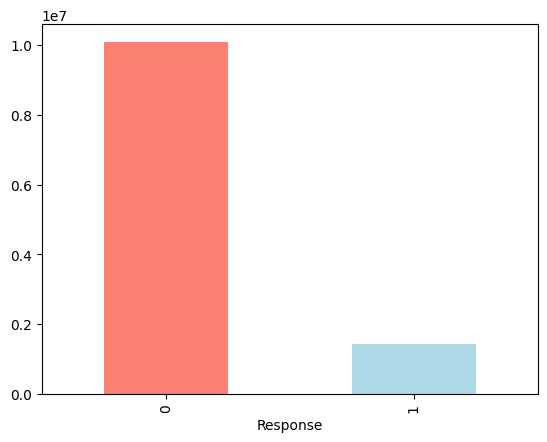

In [ ]:
data_train['Response'].value_counts().plot(kind = "bar",
                                     color = ["salmon", "lightblue"]);

In [ ]:
# Let us check if there are any missing values present in the dataset
data_train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


In [ ]:
for label, content in data_train.items():
    if not pd.api.types.is_any_real_numeric_dtype(content):
        data_train[label] = pd.Categorical(content).codes + 1

In [ ]:
data_train.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,2,21,1,35.0,0,1,2,65101.0,124.0,187,0
1,2,43,1,28.0,0,3,2,58911.0,26.0,288,1
2,1,25,1,14.0,1,2,1,38043.0,152.0,254,0
3,1,35,1,1.0,0,1,2,2630.0,156.0,76,0
4,1,36,1,15.0,1,1,1,31951.0,152.0,294,0
5,1,31,1,47.0,1,2,1,28150.0,152.0,197,0
6,2,23,1,45.0,1,2,1,27128.0,152.0,190,0
7,1,47,1,8.0,0,1,2,40659.0,26.0,262,1
8,1,26,1,28.0,1,2,1,31639.0,152.0,36,0


In [ ]:
data_train.dtypes.value_counts()

int64      5
int8       3
float64    3
Name: count, dtype: int64

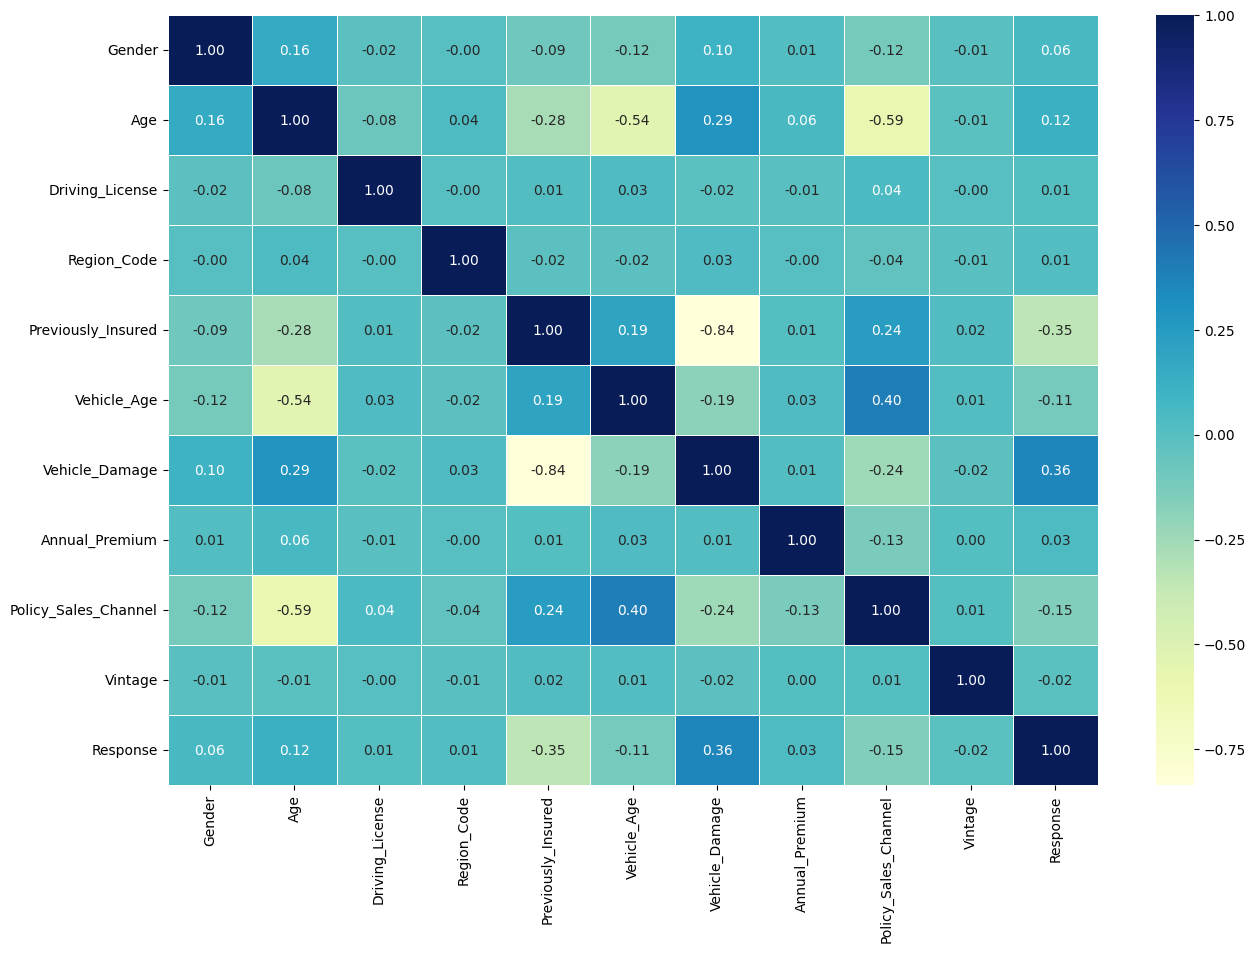

In [ ]:
# Let us make a correlation matrix
corr_matrix = data_train.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths= 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu");